<a href="https://colab.research.google.com/github/Sindhura-tr/Machine-Learning-satsun-5-7/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Time Series Decomposition
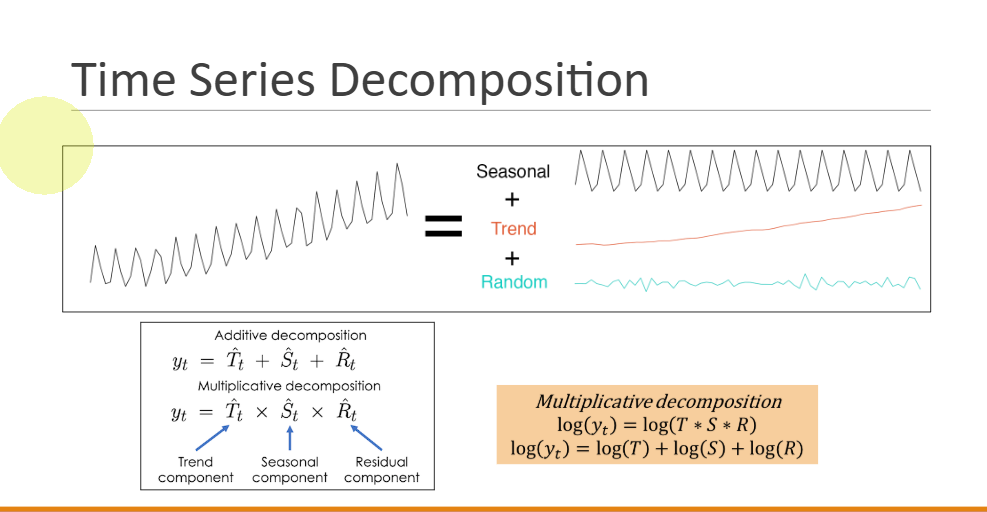

In [1]:
%pip install pmdarima

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the dataset

In [3]:
import pandas as pd
df = pd.read_csv('/content/AirPassengers.csv',index_col="Month",parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.resample("YE").sum()

,Passengers
Month,
1949-12-31,1520
1950-12-31,1676
1951-12-31,2042
1952-12-31,2364
1953-12-31,2700
1954-12-31,2867
1955-12-31,3408
1956-12-31,3939
1957-12-31,4421


In [5]:
df.resample("YE").mean()

,Passengers
Month,
1949-12-31,126.666667
1950-12-31,139.666667
1951-12-31,170.166667
1952-12-31,197.000000
1953-12-31,225.000000
1954-12-31,238.916667
1955-12-31,284.000000
1956-12-31,328.250000
1957-12-31,368.416667


In [6]:
df.resample("QE").median()

,Passengers
Month,
1949-03-31,118.0
1949-06-30,129.0
1949-09-30,148.0
1949-12-31,118.0
1950-03-31,126.0
1950-06-30,135.0
1950-09-30,170.0
1950-12-31,133.0
1951-03-31,150.0


## Visualize time series
    Seasonality
    Trend
    Residual

In [7]:
import matplotlib.pyplot as plt

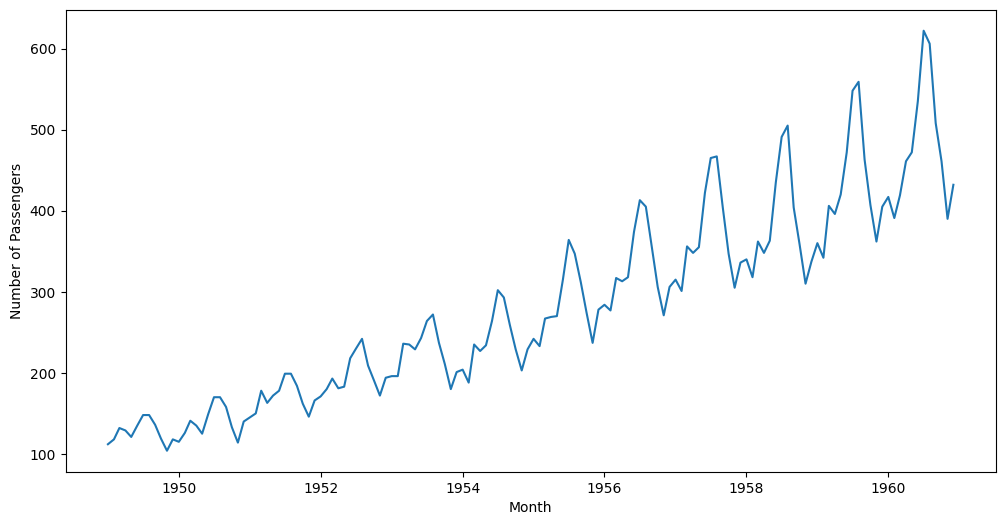

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df["Passengers"])
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.show()

## Decomposition

In [9]:
from statsmodels.tsa.seasonal import  seasonal_decompose


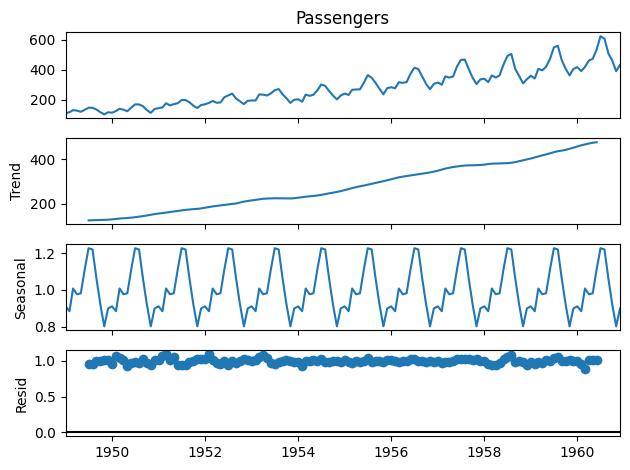

In [10]:
s = seasonal_decompose(df["Passengers"],model="mul")
s.plot()
plt.show()

## Trend

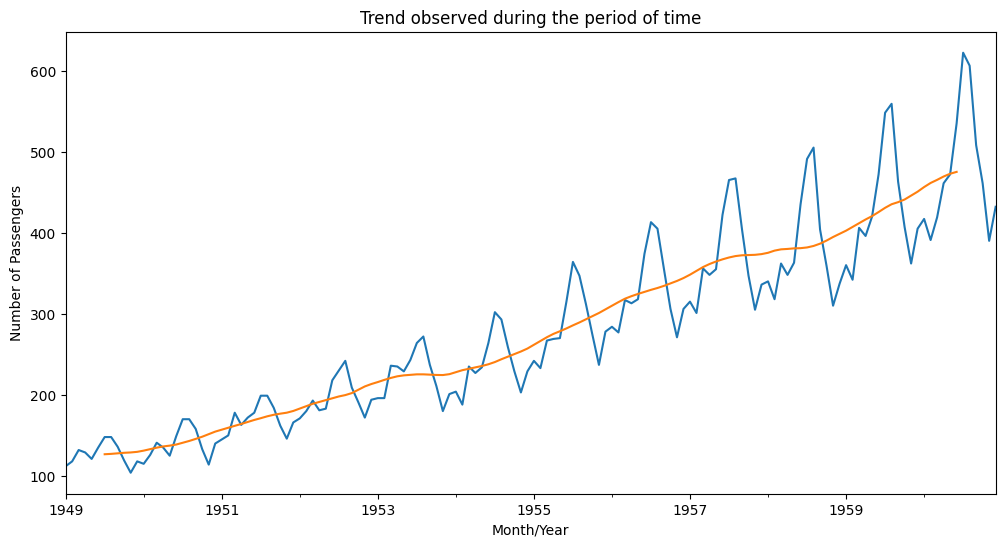

In [11]:
plt.figure(figsize=(12,6))
s.observed.plot()
s.trend.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Trend observed during the period of time")
plt.show()

## Seasonality

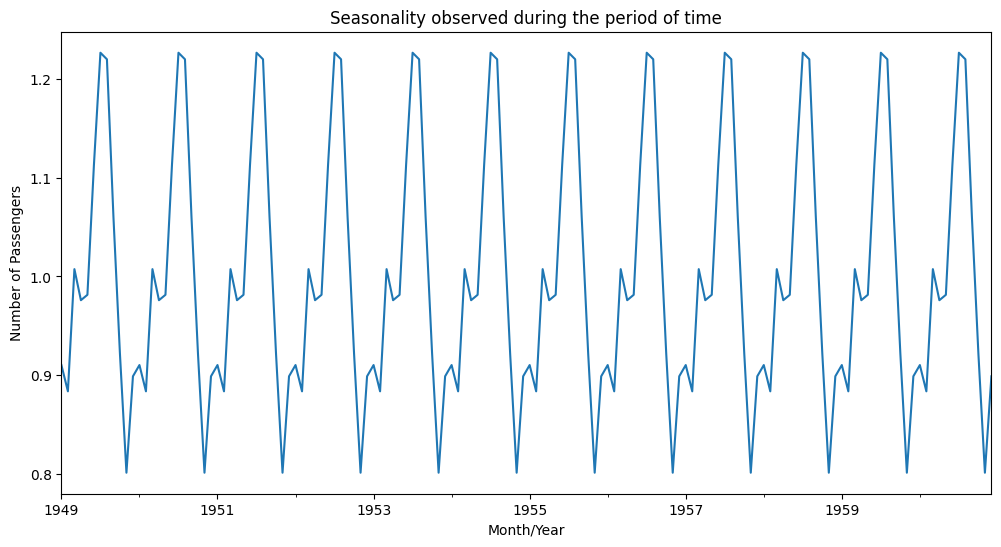

In [12]:
plt.figure(figsize=(12,6))
s.seasonal.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Seasonality observed during the period of time")
plt.show()

## Residual

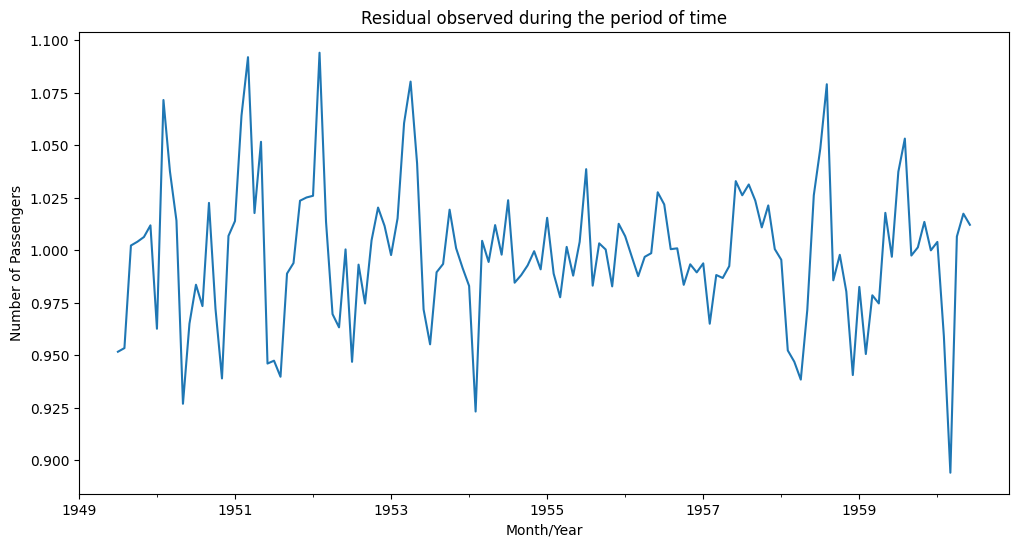

In [13]:
plt.figure(figsize=(12,6))
s.resid.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Residual observed during the period of time")
plt.show()

## Forecasting of Passengers

If you get an error while import auto_arima, then install below packages as per versions
pip install numpy==1.24.4
pip install pmdarima==2.0.3

In [14]:
pip install numpy==1.24.4

In [15]:
pip install pmdarima==2.0.3

In [16]:
from pmdarima.arima import auto_arima

In [17]:
model = auto_arima(df["Passengers"],seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=2.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.72 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=3.53 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=1.87 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=6.20 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.69 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=1.20 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=1.66 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.75 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.53 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.09 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.09 sec
 ARIMA(3,1,1)(0,1,0

In [18]:
model.order

(2, 1, 1)

## Forecast for next 4 years
months = 4*12 = 48 month

In [19]:
months = 48 # 4*12
forecast,conf = model.predict(n_periods=months,return_conf_int=True)

In [20]:
forecast

,0
1961-01-01,445.635047
1961-02-01,420.395210
1961-03-01,449.198597
1961-04-01,491.840277
1961-05-01,503.394845
1961-06-01,566.862848
1961-07-01,654.260595
1961-08-01,638.597923
1961-09-01,540.884188
1961-10-01,494.127074


In [21]:
conf

array([[423.3449527 , 467.92514136],
       [394.23553794, 446.55488277],
       [419.83190563, 478.56528827],
       [460.37649073, 523.30406231],
       [470.38071454, 536.40897588],
       [532.69960302, 601.02609383],
       [619.2214286 , 689.29976217],
       [602.88014095, 674.31570459],
       [504.63152172, 577.13685354],
       [457.44615481, 530.80799371],
       [386.3040438 , 460.36229073],
       [428.19150139, 502.82457347],
       [433.49774643, 525.08517903],
       [405.10910462, 503.24594666],
       [431.15587109, 535.01960611],
       [471.84078151, 579.79934011],
       [481.87380342, 593.02927695],
       [544.156801  , 657.81280391],
       [630.60895416, 746.26688986],
       [614.17933261, 731.46513398],
       [515.83253166, 634.46419674],
       [468.54419728, 588.30595741],
       [397.29731781, 518.02242678],
       [439.07994872, 560.63824366],
       [446.32726574, 580.99910573],
       [418.31833236, 558.81523234],
       [444.62436046, 590.35938501],
 

In [22]:
df_forecast = forecast.to_frame()
df_forecast

,0
1961-01-01,445.635047
1961-02-01,420.395210
1961-03-01,449.198597
1961-04-01,491.840277
1961-05-01,503.394845
1961-06-01,566.862848
1961-07-01,654.260595
1961-08-01,638.597923
1961-09-01,540.884188
1961-10-01,494.127074


In [23]:
df_forecast.columns = ["Forecast"]
df_forecast.index.name = "Month"

In [24]:
df_forecast

,Forecast
Month,
1961-01-01,445.635047
1961-02-01,420.395210
1961-03-01,449.198597
1961-04-01,491.840277
1961-05-01,503.394845
1961-06-01,566.862848
1961-07-01,654.260595
1961-08-01,638.597923
1961-09-01,540.884188


In [25]:
df_forecast[["Lower Confidence Bound","Upper COnfidence Bound"]] = conf
df_forecast

,Forecast,Lower Confidence Bound,Upper COnfidence Bound
Month,,,
1961-01-01,445.635047,423.344953,467.925141
1961-02-01,420.395210,394.235538,446.554883
1961-03-01,449.198597,419.831906,478.565288
1961-04-01,491.840277,460.376491,523.304062
1961-05-01,503.394845,470.380715,536.408976
1961-06-01,566.862848,532.699603,601.026094
1961-07-01,654.260595,619.221429,689.299762
1961-08-01,638.597923,602.880141,674.315705
1961-09-01,540.884188,504.631522,577.136854


In [26]:
df_forecast = df_forecast.round(0).astype(int)
df_forecast

,Forecast,Lower Confidence Bound,Upper COnfidence Bound
Month,,,
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577


In [28]:
df_forecast.to_csv("Forecasted Results.csv")

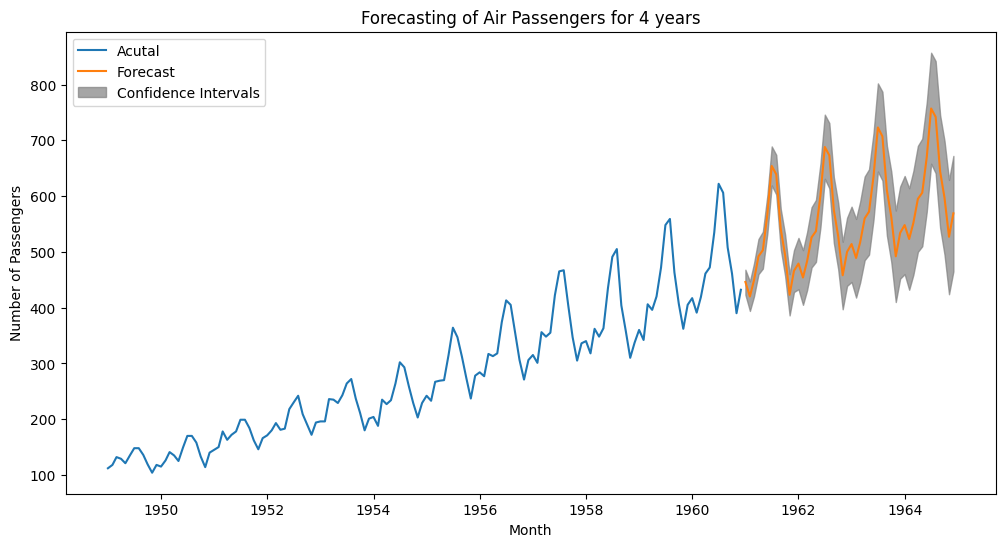

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df["Passengers"],label="Acutal")
plt.plot(df_forecast["Forecast"],label="Forecast")
plt.fill_between(df_forecast.index,df_forecast["Lower Confidence Bound"],df_forecast["Upper COnfidence Bound"],color="gray",alpha=0.7,label="Confidence Intervals")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Forecasting of Air Passengers for 4 years")
plt.legend()
plt.show()